A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")
df

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [95]:
df.select_dtypes('object')

,Team,Shooting Accuracy,% Goals-to-shots,Passing Accuracy,Saves-to-shots ratio
0,Croatia,51.9%,16.0%,76.9%,81.3%
1,Czech Republic,41.9%,12.9%,78.1%,60.1%
2,Denmark,50.0%,20.0%,83.3%,66.7%
3,England,50.0%,17.2%,80.6%,88.1%
4,France,37.9%,6.5%,87.2%,54.6%
5,Germany,47.8%,15.6%,87.4%,62.6%
6,Greece,30.7%,19.2%,76.7%,65.1%
7,Italy,43.0%,7.5%,83.9%,74.1%
8,Netherlands,25.0%,4.1%,88.7%,70.6%
9,Poland,39.4%,5.2%,80.4%,66.7%


In [96]:
df.select_dtypes('object').iloc[:,1:5]

,Shooting Accuracy,% Goals-to-shots,Passing Accuracy,Saves-to-shots ratio
0,51.9%,16.0%,76.9%,81.3%
1,41.9%,12.9%,78.1%,60.1%
2,50.0%,20.0%,83.3%,66.7%
3,50.0%,17.2%,80.6%,88.1%
4,37.9%,6.5%,87.2%,54.6%
5,47.8%,15.6%,87.4%,62.6%
6,30.7%,19.2%,76.7%,65.1%
7,43.0%,7.5%,83.9%,74.1%
8,25.0%,4.1%,88.7%,70.6%
9,39.4%,5.2%,80.4%,66.7%


In [97]:
df_sin_caracter = df.select_dtypes('object').iloc[:,1:5].replace('%','',regex=True).astype(float)

In [98]:
df_sin_caracter

,Shooting Accuracy,% Goals-to-shots,Passing Accuracy,Saves-to-shots ratio
0,51.9,16.0,76.9,81.3
1,41.9,12.9,78.1,60.1
2,50.0,20.0,83.3,66.7
3,50.0,17.2,80.6,88.1
4,37.9,6.5,87.2,54.6
5,47.8,15.6,87.4,62.6
6,30.7,19.2,76.7,65.1
7,43.0,7.5,83.9,74.1
8,25.0,4.1,88.7,70.6
9,39.4,5.2,80.4,66.7


In [99]:
df_sin_caracter.columns

Index(['Shooting Accuracy', '% Goals-to-shots', 'Passing Accuracy',
       'Saves-to-shots ratio'],
      dtype='object')

In [100]:
for i in df_sin_caracter.columns:
    df[i] = df_sin_caracter[i]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     float64
 5   % Goals-to-shots            16 non-null     float64
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [138]:
df.iloc[:,10:]

,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,2,1076,828,76.9,1706,60,42,14,49,83,...,13,81.3,41,62,2,9,0,9,9,16
1,0,1565,1223,78.1,2358,46,68,21,62,98,...,9,60.1,53,73,8,7,0,11,11,19
2,3,1298,1082,83.3,1873,43,32,16,40,61,...,10,66.7,25,38,8,4,0,7,7,15
3,3,1488,1200,80.6,2440,58,60,16,86,106,...,22,88.1,43,45,6,5,0,11,11,16
4,0,2066,1803,87.2,2909,55,76,28,71,76,...,6,54.6,36,51,5,6,0,11,11,19
5,2,2774,2427,87.4,3761,101,60,35,91,73,...,10,62.6,63,49,12,4,0,15,15,17
6,0,1187,911,76.7,2016,52,53,10,65,123,...,13,65.1,67,48,12,9,1,12,12,20
7,2,3016,2531,83.9,4363,75,75,30,98,137,...,20,74.1,101,89,16,16,0,18,18,19
8,0,1556,1381,88.7,2163,50,49,22,34,41,...,12,70.6,35,30,3,5,0,7,7,15
9,1,1059,852,80.4,1724,55,39,14,67,87,...,6,66.7,48,56,3,7,1,7,7,17


## 1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

## Columnas más correlacionadas

In [176]:
# 1) Matriz de correlación con valores absolutos
corr_matrix = df.corr().abs()

# 2) Valores para los cuales la correlación es mayor al valor que deseemos (0.95 en este caso)
high_corr_var=np.where(corr_matrix>0.95)

# 3) Lista de tuplas de dichas columnas con mayor correlación
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x<y]
high_corr_var

[('Passes', 'Passes completed'),
 ('Passes', 'Touches'),
 ('Passes completed', 'Touches'),
 ('Subs on', 'Subs off')]

## 2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

# Regresión lineal (Shooting Accuracy - Goals)

x_trian: (12, 1)
x_test: (4, 1)
y_trian: (12,)
y_test: (4,)
-----------
Score TRAIN: 30.170578934529736
Score TEST: -0.19408831858691578
-----------


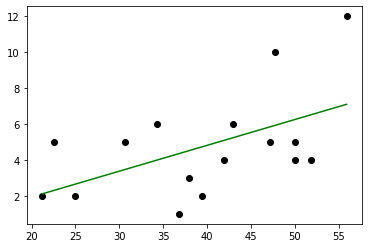

In [207]:
seed = 42

x = np.array(df['Shooting Accuracy']).reshape(-1, 1)
y = np.array(df['Goals'])

# Se parte el conjunto en "train" y "test".

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=seed)
print('x_trian:', x_train.shape)
print('x_test:', x_test.shape)
print('y_trian:', y_train.shape)
print('y_test:', y_test.shape)
print('-----------')

# Entrenando el modelo

model_linreg = LinearRegression()
model_linreg.fit(x_train, y_train)

y_train_pred = model_linreg.predict(x_train)
print('Score TRAIN:', model_linreg.score(x_train, y_train) * 100)
print('Score TEST:', model_linreg.score(x_test, y_test) * 100)
print('-----------')

plt.scatter(x,y, color = 'black')
x_train_to_show, y_train_pred = zip(*sorted(zip(x_train, y_train_pred)))
plt.plot(x_train_to_show, y_train_pred, color = 'green');

# Regresión NO lineal (Shooting Accuracy - Goals)


Score TRAIN (R2) - Degree =  2 :  50.012 

Score TEST (R2) - Degree =  2 :  -22.092 



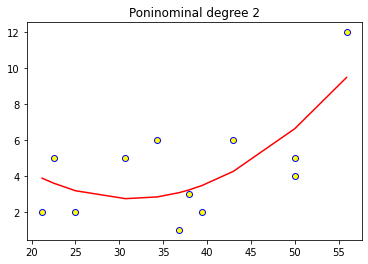



Score TRAIN (R2) - Degree =  3 :  67.194 

Score TEST (R2) - Degree =  3 :  -82.007 



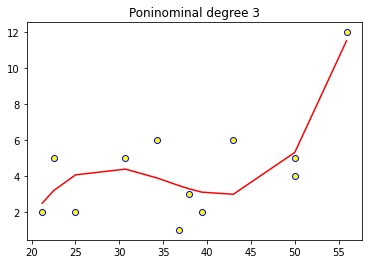



Score TRAIN (R2) - Degree =  4 :  67.988 

Score TEST (R2) - Degree =  4 :  -85.868 



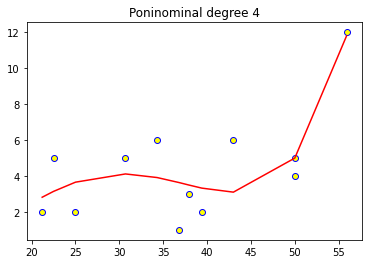



Score TRAIN (R2) - Degree =  5 :  68.611 

Score TEST (R2) - Degree =  5 :  -67.783 



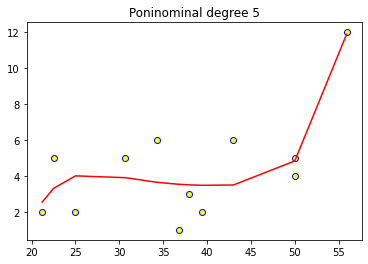



Score TRAIN (R2) - Degree =  6 :  75.21 

Score TEST (R2) - Degree =  6 :  22.922 



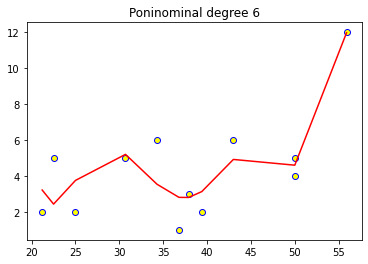



Score TRAIN (R2) - Degree =  7 :  90.845 

Score TEST (R2) - Degree =  7 :  -701.284 



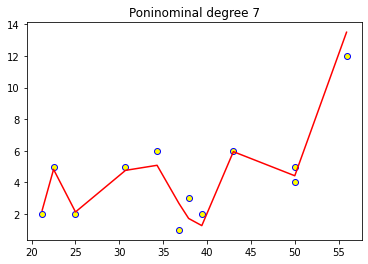



Score TRAIN (R2) - Degree =  8 :  91.949 

Score TEST (R2) - Degree =  8 :  -1579.285 



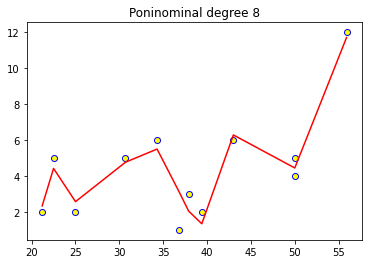



Score TRAIN (R2) - Degree =  9 :  90.002 

Score TEST (R2) - Degree =  9 :  -2705.192 



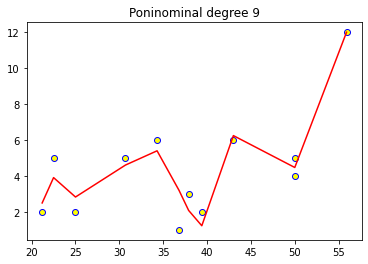



Score TRAIN (R2) - Degree =  10 :  84.191 

Score TEST (R2) - Degree =  10 :  -491.869 



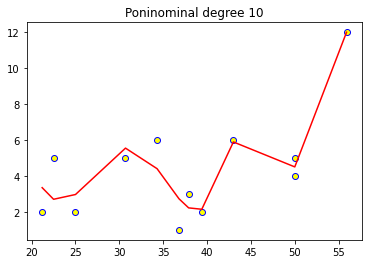



Scores TRAIN:  {'2': 50.012, '3': 67.194, '4': 67.988, '5': 68.611, '6': 75.21, '7': 90.845, '8': 91.949, '9': 90.002, '10': 84.191}
Scores TEST:  {'2': -22.092, '3': -82.007, '4': -85.868, '5': -67.783, '6': 22.922, '7': -701.284, '8': -1579.285, '9': -2705.192, '10': -491.869}


In [211]:
seed = 42

x = np.array(df['Shooting Accuracy']).reshape(-1, 1)
y = np.array(df['Goals'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state = seed)

degree_min = 2
degree_max = 10
scores_train_degree = {}
scores_test_degree = {}
for degree in range(degree_min, degree_max + 1):
    polinomial_model = PolynomialFeatures(degree = degree)
    x_train_poly = polinomial_model.fit_transform(x_train, y_train)

# Entrenar la LinearRegression con la salida del fit_transform (x_train_poly, y_train)
    model_linreg_poly = LinearRegression()
    model_linreg_poly.fit(x_train_poly, y_train)

# Predicción de "y" con "x_poly"
    y_train_pred = model_linreg_poly.predict(x_train_poly)
    #print('y_pred:', y_pred)
    r2_score(y_train, y_train_pred)
    print('Score TRAIN (R2) - Degree = ', degree, ': ', round(r2_score(y_train, y_train_pred) * 100, 3), '\n')
    scores_train_degree[str(degree)] = round(r2_score(y_train, y_train_pred) * 100, 3)

# AHORA PARA TEST --> Nótese que, como el modelo polinómico ya está entrenado... No hace falta poner y_train.
    x_test_poly = polinomial_model.fit_transform(x_test) 
    y_test_pred = model_linreg_poly.predict(x_test_poly)
    print('Score TEST (R2) - Degree = ', degree, ': ', round(r2_score(y_test, y_test_pred) * 100, 3), '\n')
    scores_test_degree[str(degree)] = round(r2_score(y_test, y_test_pred) * 100, 3)
    


    x_train_to_show, y_train_to_show = zip(*sorted(zip(x_train, y_train)))
    plt.scatter(x_train_to_show, y_train_to_show, color='yellow', edgecolors='blue')
    x_train_to_show, y_train_pred = zip(*sorted(zip(x_train, y_train_pred)))
    plt.plot(x_train_to_show, y_train_pred, color='red')
    #plt.scatter(x_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    print('\n===========================================================\n')
print('Scores TRAIN: ', scores_train_degree)
print('Scores TEST: ', scores_test_degree)

## Tomamos como mejor resultado el modelo con degree = 6 

Score TRAIN (R2) - Degree =  6 :  75.21 

Score TEST (R2) - Degree =  6 :  22.922 



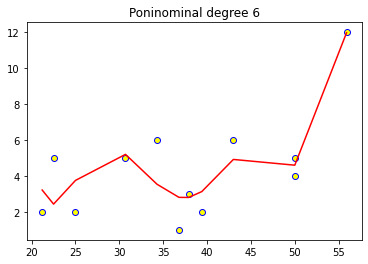

In [217]:
seed = 42
degree = 6

polinomial_model_degree_6 = PolynomialFeatures(degree = degree)
x_train_poly = polinomial_model.fit_transform(x_train, y_train)

# Entrenar la LinearRegression con la salida del fit_transform (x_train_poly, y_train)
model_linreg_poly_degree_6 = LinearRegression()
model_linreg_poly_degree_6.fit(x_train_poly, y_train)

# Predicción de "y" con "x_poly"
y_train_pred = model_linreg_poly_degree_6.predict(x_train_poly)
#print('y_pred:', y_pred)
r2_score(y_train, y_train_pred)
print('Score TRAIN (R2) - Degree = ', degree, ': ', round(r2_score(y_train, y_train_pred) * 100, 3), '\n')
scores_train_degree[str(degree)] = round(r2_score(y_train, y_train_pred) * 100, 3)

# AHORA PARA TEST --> Nótese que, como el modelo polinómico ya está entrenado... No hace falta poner y_train.
x_test_poly = polinomial_model_degree_6.fit_transform(x_test) 
y_test_pred = model_linreg_poly_degree_6.predict(x_test_poly)
print('Score TEST (R2) - Degree = ', degree, ': ', round(r2_score(y_test, y_test_pred) * 100, 3), '\n')
scores_test_degree[str(degree)] = round(r2_score(y_test, y_test_pred) * 100, 3)

x_train_to_show, y_train_to_show = zip(*sorted(zip(x_train, y_train)))
plt.scatter(x_train_to_show, y_train_to_show, color='yellow', edgecolors='blue')
x_train_to_show, y_train_pred = zip(*sorted(zip(x_train, y_train_pred)))
plt.plot(x_train_to_show, y_train_pred, color='red')
#plt.scatter(x_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

# SVR (Shooting Accuracy - Goals)

In [237]:
seed = 42

x = np.array(df['Shooting Accuracy']).reshape(-1, 1)
y = np.array(df['Goals'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=seed)
print('x_trian:', x_train.shape)
print('x_test:', x_test.shape)
print('y_trian:', y_train.shape)
print('y_test:', y_test.shape)
print('-----------')

model_SVR = svm.SVR(kernel='poly', degree = 6, C=1)

model_SVR.fit(x_train, y_train)

y_train_pred = model_SVR.predict(x_train)
print('Score TRAIN:', model_SVR.score(x_train, y_train) * 100)
print('Score TEST:', model_SVR.score(x_test, y_test) * 100)
print('-----------')

#prediccion = model_SVR.predict(x_svr_test)
#plt.scatter(x_svr, y_svr, color= 'red', edgecolors= 'black');
#plt.plot(x_svr_test, prediccion, color= 'green');

x_trian: (12, 1)
x_test: (4, 1)
y_trian: (12,)
y_test: (4,)
-----------
Score TRAIN: 43.63400879085108
Score TEST: -36.09718506204243
-----------
